# 우리 동네 인구 구조 시각화 하기
https://jumin.mois.go.kr/index.jsp#


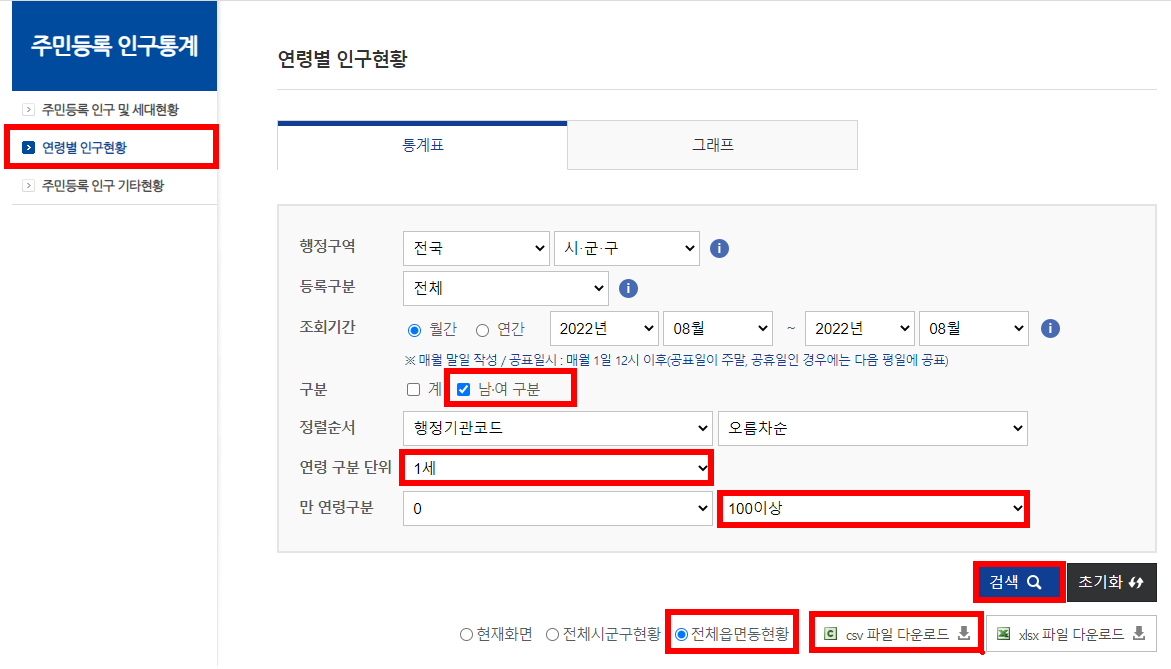

## 데이터 기초 정보 파악

In [1]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
population = pd.read_csv('./data/population.csv', encoding='cp949')

In [3]:
population.head()

,행정구역,2022년08월_남_총인구수,2022년08월_남_연령구간인구수,2022년08월_남_0세,2022년08월_남_1세,2022년08월_남_2세,2022년08월_남_3세,2022년08월_남_4세,2022년08월_남_5세,2022년08월_남_6세,...,2022년08월_여_91세,2022년08월_여_92세,2022년08월_여_93세,2022년08월_여_94세,2022년08월_여_95세,2022년08월_여_96세,2022년08월_여_97세,2022년08월_여_98세,2022년08월_여_99세,2022년08월_여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [4]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Columns: 207 entries, 행정구역 to 2022년08월_여_100세 이상
dtypes: int64(8), object(199)
memory usage: 6.1+ MB


In [5]:
population.columns

Index(['행정구역', '2022년08월_남_총인구수', '2022년08월_남_연령구간인구수', '2022년08월_남_0세',
       '2022년08월_남_1세', '2022년08월_남_2세', '2022년08월_남_3세', '2022년08월_남_4세',
       '2022년08월_남_5세', '2022년08월_남_6세',
       ...
       '2022년08월_여_91세', '2022년08월_여_92세', '2022년08월_여_93세', '2022년08월_여_94세',
       '2022년08월_여_95세', '2022년08월_여_96세', '2022년08월_여_97세', '2022년08월_여_98세',
       '2022년08월_여_99세', '2022년08월_여_100세 이상'],
      dtype='object', length=207)

In [12]:
#컬럼명 2022년08월_ 삭제

population.columns.str.replace('2022년08월_','')

Index(['행정구역', '남_총인구수', '남_연령구간인구수', '남_0세', '남_1세', '남_2세', '남_3세', '남_4세',
       '남_5세', '남_6세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=207)

In [13]:
population.columns = population.columns.str.replace('2022년08월_','')

In [14]:
population.columns

Index(['행정구역', '남_총인구수', '남_연령구간인구수', '남_0세', '남_1세', '남_2세', '남_3세', '남_4세',
       '남_5세', '남_6세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=207)

In [15]:
population.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [18]:
#전처리한 데이터프레임 저장
population.to_csv('./data/population_new.csv', index=False)

In [19]:
new_population = pd.read_csv('./data/population_new.csv')
new_population.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [25]:
new_population.columns

Index(['행정구역', '남_총인구수', '남_연령구간인구수', '남_0세', '남_1세', '남_2세', '남_3세', '남_4세',
       '남_5세', '남_6세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=207)

In [26]:
#남자만 출력
male = new_population.iloc[ :,3:104]
male.head()

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
0,"21,115","23,013","23,458","25,684","26,926","29,115","33,125","34,405","34,172","35,784",...,"2,102","1,649","1,474",978,664,392,301,240,246,414
1,232,248,270,261,299,320,426,399,415,451,...,52,37,44,13,26,18,12,9,8,15
2,24,24,28,21,27,44,47,44,46,51,...,2,3,1,0,4,1,3,1,0,1
3,17,14,15,21,24,30,37,45,24,36,...,3,1,10,2,4,4,2,2,1,1
4,2,3,2,2,4,4,6,7,4,7,...,2,2,1,1,2,1,0,1,0,2


In [28]:
#여자만 출력
female = new_population.iloc[ : , 106: ]
female

,여_0세,여_1세,여_2세,여_3세,여_4세,여_5세,여_6세,여_7세,여_8세,여_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,"19,816","21,718","22,053","23,561","25,352","27,939","31,868","32,984","32,286","33,944",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,212,236,260,284,281,336,395,382,445,440,...,126,104,78,77,49,29,20,13,15,28
2,24,22,20,31,25,36,39,44,53,44,...,13,4,6,5,2,3,0,2,1,2
3,17,16,21,22,21,33,32,24,48,29,...,13,8,8,3,2,4,3,0,3,0
4,2,4,3,3,9,4,6,6,6,7,...,1,5,0,2,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,42,40,34,51,61,66,82,89,84,86,...,8,3,4,6,0,2,0,0,2,1
3863,58,47,58,61,74,89,80,93,69,89,...,11,14,6,6,5,4,2,1,5,7
3864,43,46,54,57,64,86,104,90,112,72,...,8,17,3,8,4,4,0,1,1,2
3865,36,35,35,48,36,45,59,56,65,70,...,8,9,9,6,4,4,1,0,2,2


In [29]:
new_population.isnull().sum()

행정구역         0
남_총인구수       0
남_연령구간인구수    0
남_0세         0
남_1세         0
            ..
여_96세        0
여_97세        0
여_98세        0
여_99세        0
여_100세 이상    0
Length: 207, dtype: int64

In [32]:
new_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Columns: 207 entries, 행정구역 to 여_100세 이상
dtypes: int64(8), object(199)
memory usage: 6.1+ MB


In [33]:
new_population.astype('int64')

ValueError: invalid literal for int() with base 10: '서울특별시  (1100000000)'

In [31]:
new_population.iloc[:, 1:].astype('int64')

ValueError: invalid literal for int() with base 10: '4,601,295'

## 데이터 전처리
* 불필요 데이터 삭제
* 컬럼0번째를 인덱스로 설정

In [36]:
# 행정구역을 index_col로 정하고 로드
df= pd.read_csv('./data/population_new.csv', index_col=0, thousands=',')
df.head()

,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),4601295,4601295,21115,23013,23458,25684,26926,29115,33125,34405,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
서울특별시 종로구 (1111000000),69408,69408,232,248,270,261,299,320,426,399,...,126,104,78,77,49,29,20,13,15,28
서울특별시 종로구 청운효자동(1111051500),5392,5392,24,24,28,21,27,44,47,44,...,13,4,6,5,2,3,0,2,1,2
서울특별시 종로구 사직동(1111053000),4124,4124,17,14,15,21,24,30,37,45,...,13,8,8,3,2,4,3,0,3,0
서울특별시 종로구 삼청동(1111054000),1130,1130,2,3,2,2,4,4,6,7,...,1,5,0,2,0,0,1,0,0,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3867 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 206 entries, 남_총인구수 to 여_100세 이상
dtypes: int64(206)
memory usage: 6.1+ MB


> **[데이터에 대한 질문]**
> * 종로구의 인구구조는 어떨까?
> * 부산시 남구 문현동의 인구구조는 어떨가?
>   
>   

In [ ]:
# 불필요한 데이터 삭제
#남_총인구수,남_연령구간인구수
#여_총인구수,여_연령구간인구수
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']

In [48]:
from operator import index


name = '아름동'



,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
세종특별자치시 아름동(3611053000),11546,11546,97,103,91,128,141,160,182,212,...,3,6,5,2,2,3,2,0,1,0


In [49]:
# 아름동이 있는지 확인
mytown = df.loc[df.index.str.contains(name)]

# 우리동네 연령별 인구구조
* 남, 여 데이터 각각 추출

In [50]:
#남여 데이터 추출
male = mytown.iloc[:,0:101]
female = mytown.iloc[:,101:202]

In [ ]:
#연령별 남여 합계 계산



## line 차트

In [ ]:
plt.figure()
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.plot()

plt.show()

> * 젊은 부부가 많이 사는 동네로 보입니다. 
> * 어린아이와 40대가 많이 살고 있고, 
> * 반면 노년층이 적습니다. 

## Bar 차트
* bar차트는 두 종류의 값들이 입력됩니다. 
* bar(막대를 표시할 위치, 막대 높이)
* 두 종류의 값들은 개수가 일치해야 합니다. 

In [ ]:
plt.figure()
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))



plt.show()

## barh 차트

In [ ]:

plt.figure()
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))


plt.show()

## 진짜 우리동네 인구구조

# 우리동네 남여 구조 

## 모든 값 음수로 변환

> **[해석]**
> *    ㅇㅇㅇ

## 진짜 우리동네 남여 구조

# 바람부는 제주에는 정말 여성의 비율이 높을까?

## 데이터 로딩 및 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('./data/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

        
#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)]

mytown['남_총인구수']

## 중복데이터가 많이 나옴, 그중에서 0번째 데이터 사용할 것임



## pie 차트
* 전체 데이터 중 특정 데이터의 비율을 보기 쉽게 표현합니다. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 
         

#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)]

m = mytown['남_총인구수'][0]
f = mytown['여_총인구수'][0]
m,f

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')



> **[해석]**
> *   ㅋㅋㅋㅋ

## line: 제주특별자치도 남여 인구 구조¶

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

# print(male.shape)


plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))







plt.legend()
plt.show()

> * 항아리 모양 그래프보다 남녀 인구의 차이가 눈에 더 잘 들어옵니다. 
> * 좀 더 차이가 한 눈에 들어오도록 한다면?

## bar:제주특별자치도 남여 인구 구조

* 남자-여자를 뺀 값으로  막대그래프 그려봄

### 데이터 로딩 및 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

print(male-female)

# 남자-여자 연산 실패 --> index값이 같이 않아서...


### 남성에서 여성인구를 빼서 차이 정도를 시각화

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

#남-여 데이터 만들기
result = male.values - female.values 

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))

plt.bar( )
plt.show()

> * 60대를 기준으로 그 이하의 연령대는 남성이 많지만,
> * 60대 이상 인구는 여성이 많다는 것이 확연히 드러납니다. 

## scatter 차트

* 데이터의 관계를 파악하는 데 도움이 되는 산점도 그래프입니다. 
* 산점도는 가로축과 세로축을 기준으로 두 요소가 서로 어떤 관계를 맺고 있는지를 파악하기 쉽게 나타낸 그래프입니다. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

#우리동네 연령별 총 인구수
total = []

for i in range(0,101):
    # print(mytown.iloc[0,i])
    total.append(mytown.iloc[0,i] + mytown.iloc[0,i+101])

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))


plt.scatter(  )
plt.show()